### Librerias y carga inicial dataset

In [103]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('diabetic_data.csv', sep=',')

In [105]:
df.shape

(101766, 50)

In [106]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [107]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


### Variable objetivo 

In [109]:
# Se revisa los valores de la variable objetivo
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [110]:
# Teniendo en cuenta que los valores >30 y <30 son situaciones negativas se reemplazan sus valores
df.replace({"NO":0,
                         "<30":1,
                         ">30":0}, inplace=True)

In [111]:
df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

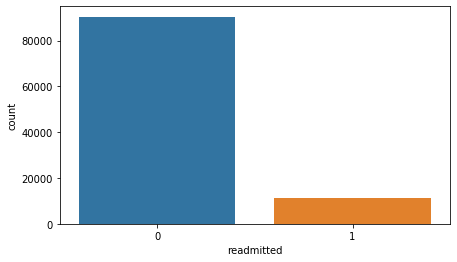

In [112]:
# Se revisa la distribución de pacientes readmitidos y no readmitidos
plt.figure(figsize=(7,4))
ax = sns.countplot(x="readmitted", data=df)

In [113]:
df['readmitted'].value_counts(normalize=True)*100

0    88.840084
1    11.159916
Name: readmitted, dtype: float64

#### Teniendo en cuenta los resultados de la grafica anterior, identificamos que nos encontramos frente a un problema con una variable objetivo desbalanceada

### Valores Nulos

In [114]:
# Se identifica que los nulos son '?', teniendo en cuenta esto se realiza el reemplazo por NaN
df = df.replace("?",np.nan)

In [115]:
# Se analiza la proporcion de datos faltantes
def missing_values_table(df):
        # Total valores faltantes
        mis_val = df.isnull().sum()
        
        # % valores faltantes 
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Tabla para presentar datos
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renombrar columnas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing ', 1 : '% of Total Values'})
        
        # Ordena la tabla de mayor faltantes a menor
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print resumen
        print ("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"      
            "De las cuales a " + str(mis_val_table_ren_columns.shape[0]) +
              " le faltan datos.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [116]:
# Se evaluan las Estadisticas de datos faltantes del dataset
missing_values = missing_values_table(df)

El dataframe tiene 50 columnas.
De las cuales a 7 le faltan datos.


In [117]:
# Se realiza print de las variables con valores nulos
missing_values

,Missing,% of Total Values
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0


In [118]:
# Teniendo en cuenta la alta proporcion de nulos se dropean las siguientes columnas
df.drop(['weight','medical_specialty','payer_code'], axis=1, inplace=True)

In [119]:
# Se eliminan los valores nulos en las demas columnas
df.dropna(inplace=True)

In [120]:
missing_values = missing_values_table(df)

El dataframe tiene 47 columnas.
De las cuales a 0 le faltan datos.


### Análisis exploratorio de datos

In [121]:
# Se identifican las variables numericas
df.select_dtypes(include=["number"]).columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

In [122]:
# Se identifican las variables categoricas
df.select_dtypes(include=["object"]).columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [123]:
# Teniendo en cuenta la gran cantidad de columnas, se realiza el analisis 
# sobre las columnas que a primera vista pueden tener mayor impacto en la predicción

### Variable 'race'

In [124]:
# Se identifican los valores que puede tomar la variable
df['race'].value_counts(normalize=True)*100

Caucasian          76.569814
AfricanAmerican    19.255913
Hispanic            2.023396
Other               1.513467
Asian               0.637410
Name: race, dtype: float64

In [125]:
# Teniendo en cuenta los valores y las proporciones de cada categoria, se decide agrupar los datos en tres grupos
# Caucasian, AfricanAmerican, Other
df['race'].replace({'Hispanic':'Other','Asian':'Other'}, inplace=True)

Caucasian          76.569814
AfricanAmerican    19.255913
Other               4.174273
Name: race, dtype: float64

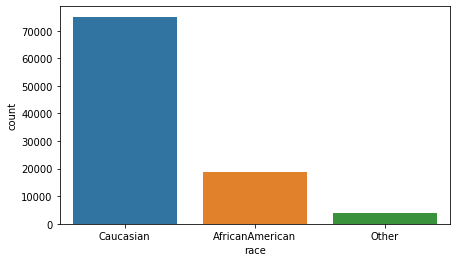

In [126]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="race", data=df)
df['race'].value_counts(normalize=True)*100

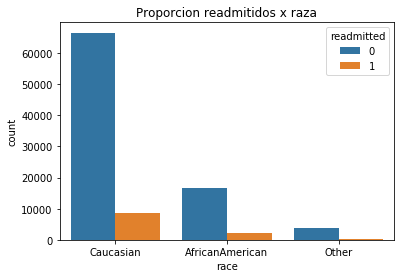

In [127]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Proporcion readmitidos x raza")
plt.show()

### Variable 'gender'

In [128]:
# Se identifican los valores que puede tomar la variable
df['gender'].value_counts(normalize=True)*100

Female             53.882084
Male               46.116896
Unknown/Invalid     0.001020
Name: gender, dtype: float64

In [129]:
# Nos encontramos con el valor 'Unknown/Invalid' por lo que se procede a eliminarlo
df.drop(df.loc[df.gender=='Unknown/Invalid'].index, inplace=True, axis=0)

Female    53.882634
Male      46.117366
Name: gender, dtype: float64

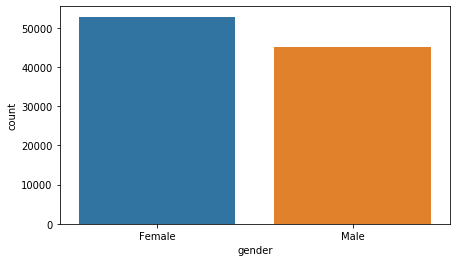

In [130]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="gender", data=df)
df['gender'].value_counts(normalize=True)*100

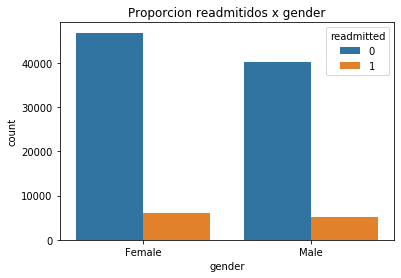

In [131]:
sns.countplot(x="gender", hue= "readmitted", data = df)
plt.title("Proporcion readmitidos x gender")
plt.show()

### Variable 'Age'

In [132]:
# Se identifican los valores que puede tomar la variable
df['age'].value_counts(normalize=True)*100

[70-80)     25.807735
[60-70)     22.242280
[80-90)     17.033819
[50-60)     17.028719
[40-50)      9.449068
[30-40)      3.618488
[90-100)     2.770979
[20-30)      1.507363
[10-20)      0.475258
[0-10)       0.066291
Name: age, dtype: float64

In [133]:
# Teniendo en cuenta que los valores estan agrupados, se decide desagregarlos quedando así una variable numerica
df.age.replace({"[90-100)":90,
                "[80-90)":80,
                "[70-80)":70,
                "[60-70)":60,
                "[50-60)":50,
                "[40-50)":40,
                "[30-40)":30,
                "[20-30)":20,
                "[10-20)":10,
                 "[0-10)":0}, inplace=True)

70    25.807735
60    22.242280
80    17.033819
50    17.028719
40     9.449068
30     3.618488
90     2.770979
20     1.507363
10     0.475258
0      0.066291
Name: age, dtype: float64

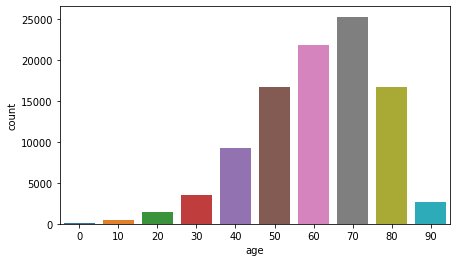

In [134]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="age", data=df)
df['age'].value_counts(normalize=True)*100

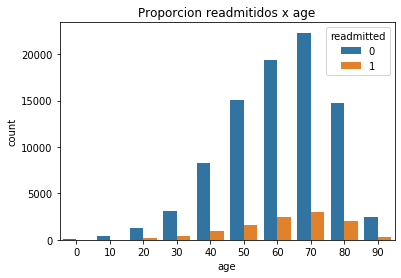

In [135]:
sns.countplot(x="age", hue= "readmitted", data = df)
plt.title("Proporcion readmitidos x age")
plt.show()